In [70]:
import numpy as np
from numpy.random import uniform as u


class NeuralNet:
    """Objeto NeuralNet para crear redes neuronales artificiales.


    Por simplicidad, supondremos que la capa de entrada siempre será de
    dos neuronas y la capa de salida siempre de una, con el fin de poder
    visualizar el funcionamiento interno de la red como un mapeo
    $\mathbb{R}^2 \to \mathbb{R}$."""

    def __init__(self, n_layers=1, n_neurons=4):
        """Constructor de la clase.
        
        Inicializa pesos aleatorios en la red neuronal.
        
        Parámetros
        ----------
        n_capas : int
            Número de capas ocultas en la red. Por default, el valor
            es 1.
        n_neuronas : int
            Número de neuronas por capa en la red. Por default, el
            valor es 4.
        """

        # Definimos pesos y biases en la capa de entrada
        self.w_in = u (-1, 1, (2, n_neurons)) # TODO u [-1, 1]/[low, high] (2, n_neurons)/size
        self.b_in = u(-1,1,(1, n_neurons)) # TODO u [-1, 1] n_neurons

        # Definimos pesos y biases en las capas ocultas
        self.w_hidden = u(-3,3, (n_layers, n_neurons, n_neurons)) 
        self.b_hidden = u(-1,1, (n_layers, n_neurons))

        # Definimos pesos y biases en las capa de salida
        self.w_out = u(-1,1, (n_neurons, 1))
        self.b_out = u(-1,1,1)

    @staticmethod
    def activate_layer (y_in, w, b):
        """Calcula el producto interno y aplica función de activación
        por capa.
        
        Parámetros
        ----------
        y_in : ndarray
            El vector con datos de entrada.
        w : ndarray
            El vector de pesos.
        b : ndarray
            El vector de biases.
        
        Retorna
        -------
        s : ndarray
            Un vector de activación reultante.
        """

        z = np.dot(y_in, w)+ b# TODO y_in · w + b
        s = 1. / (1. + np.exp(-z)) # TODO apply sigmoid
        
        return s

    def feedforward(self, y_in):
        """Calcula el producto interno y aplica función de activación
        por capa.
        
        Parámetros
        ----------
        y_in : ndarray
            El vector con datos de entrada.
        w : ndarray
            El vector de pesos.
        b : ndarray
            El vector de biases.
        
        Retorna
        -------
        s : ndarray
            Un vector de activación reultante."""

        y = self.activate_layer(y_in, self.w_in, self.b_in)
        for i in range(self.w_hidden.shape[0]):  # Número de capas ocultas
            y = self.activate_layer(y, self.w_hidden[i], self.b_hidden[i]) 
        output = self.activate_layer(y, self.w_out, self.b_out)
        
        return output
    
    def visualize(self, grid_size=50, colormap='viridis', c_reverse=False):
        """Función para visualizar el mapeo de la red neuronal en un 
        plano 2D.
        
        Parámetros
        ----------
        grid_size : int
            El tamaño a utlizar para crear rejilla. La rejilla se crea de 
            tamaño (grid_size, grid_size). El valor default es 50.
        colormap : str
            El mapa de color a utilizar. El valor default es 'viridis'.
        c_reverse : bool
            Flag para especificar si se invierte el mapa de color. El valor
            default es False.
        """

        import matplotlib.pyplot as plt
        import matplotlib as mpl
        mpl.rcParams['figure.dpi'] = 300

        # Creamos una rejilla
        x = np.linspace(-0.5, 0.5, grid_size)
        y = np.linspace(-0.5, 0.5, grid_size)
        xx, yy = np.meshgrid(x, y)

        # Para todas las coordenadas (x, y) en la rejilla,
        # hacemos una única lista con los pares de puntos
        x_flat = xx.flatten()
        y_flat = yy.flatten()
        y_in = zip(x_flat, y_flat)
        y_in = np.array(list(y_in))

        # Hacemos feedforward con la red
        y_out = self.feedforward (y_in)
        
        # Redimensionamos a la rejilla
        y_out_2d = np.reshape(y_out, (grid_size, grid_size))

        if c_reverse:
            cmap = plt.cm.get_cmap(colormap)
            cmap = cmap.reversed()
        else:
            cmap = colormap
        
        # Graficamos los resultados de la red
        plt.figure(figsize=(10, 10))
        plt.axes([0, 0, 1, 1])
        plt.imshow(
            y_out_2d,
            extent=[-0.5, 0.5, -0.5, 0.5],
            interpolation='nearest',
            cmap=cmap
        )
        plt.axis(False)
        plt.show()

In [71]:
# Definir valores de entrada 

y_in = np.array([0.8,0.2])

In [72]:
nn = NeuralNet()

In [73]:
nn.w_out


array([[-0.35801896],
       [-0.95866624],
       [-0.31796475],
       [-0.14456015]])

In [74]:
deep_nn = NeuralNet(n_layers=20, n_neurons=100)

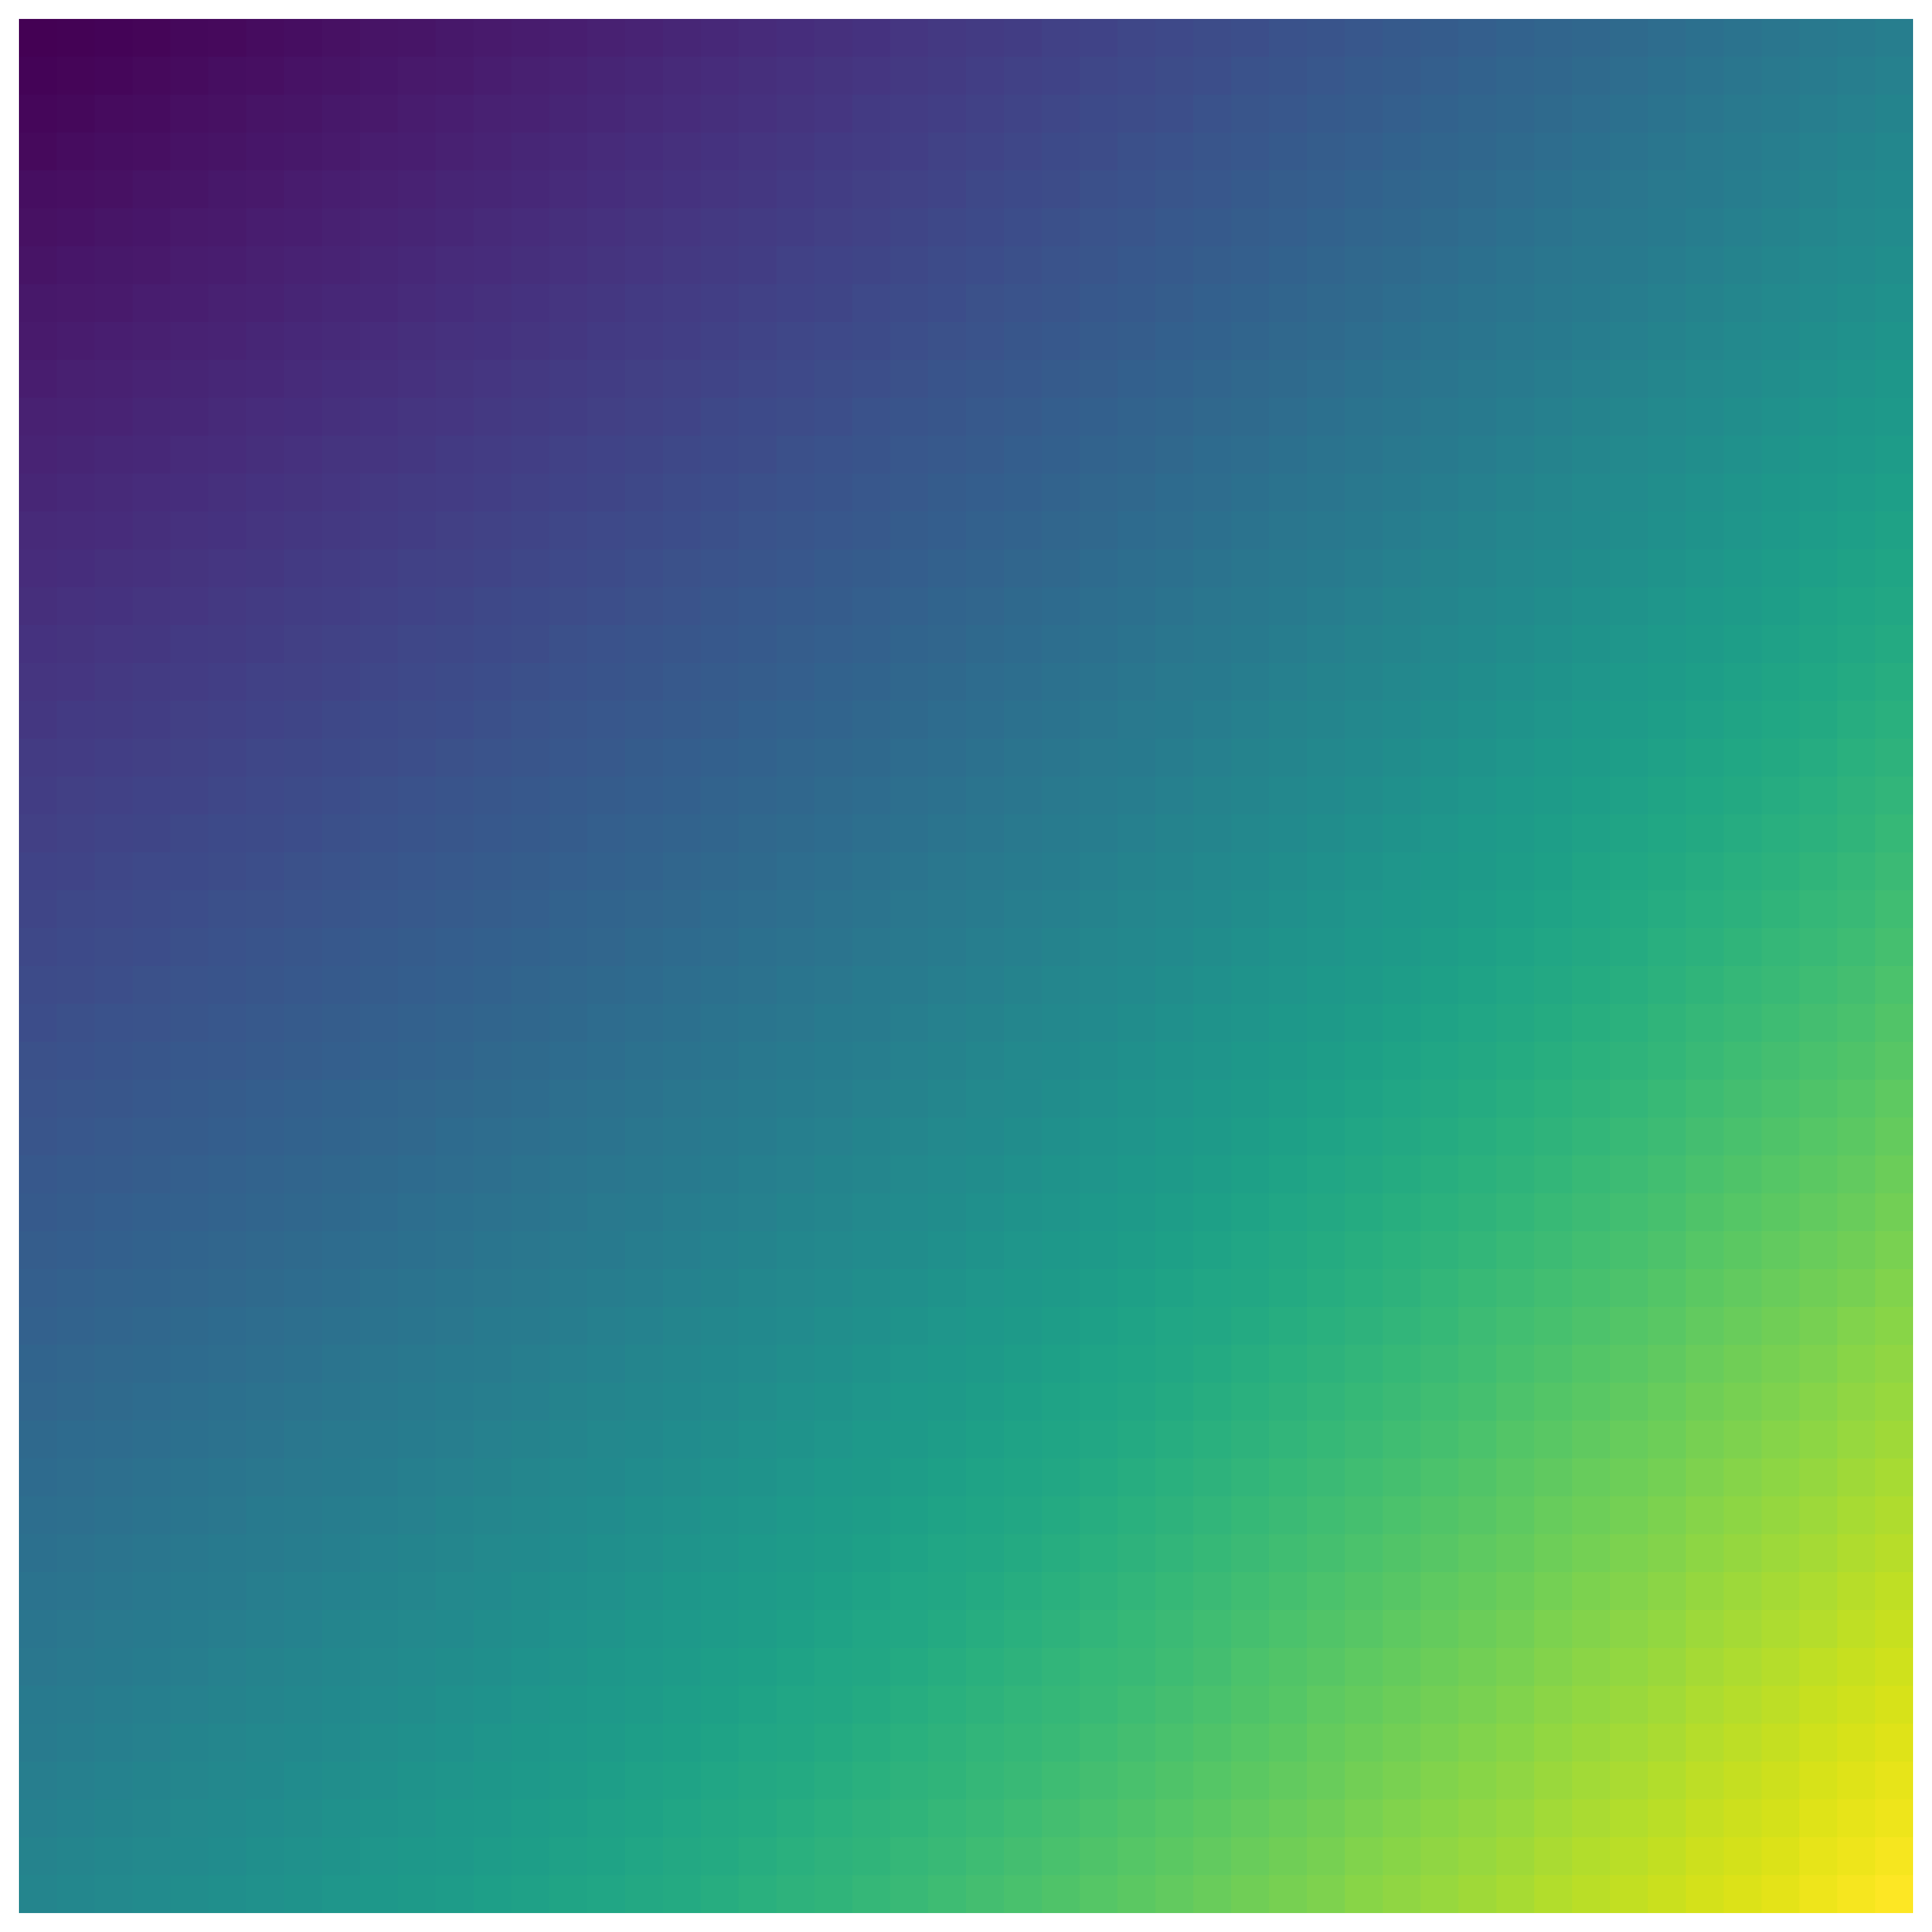

In [75]:
nn.visualize()

In [76]:
deep_nn.feedforward(y_in)

array([[0.97859372]])

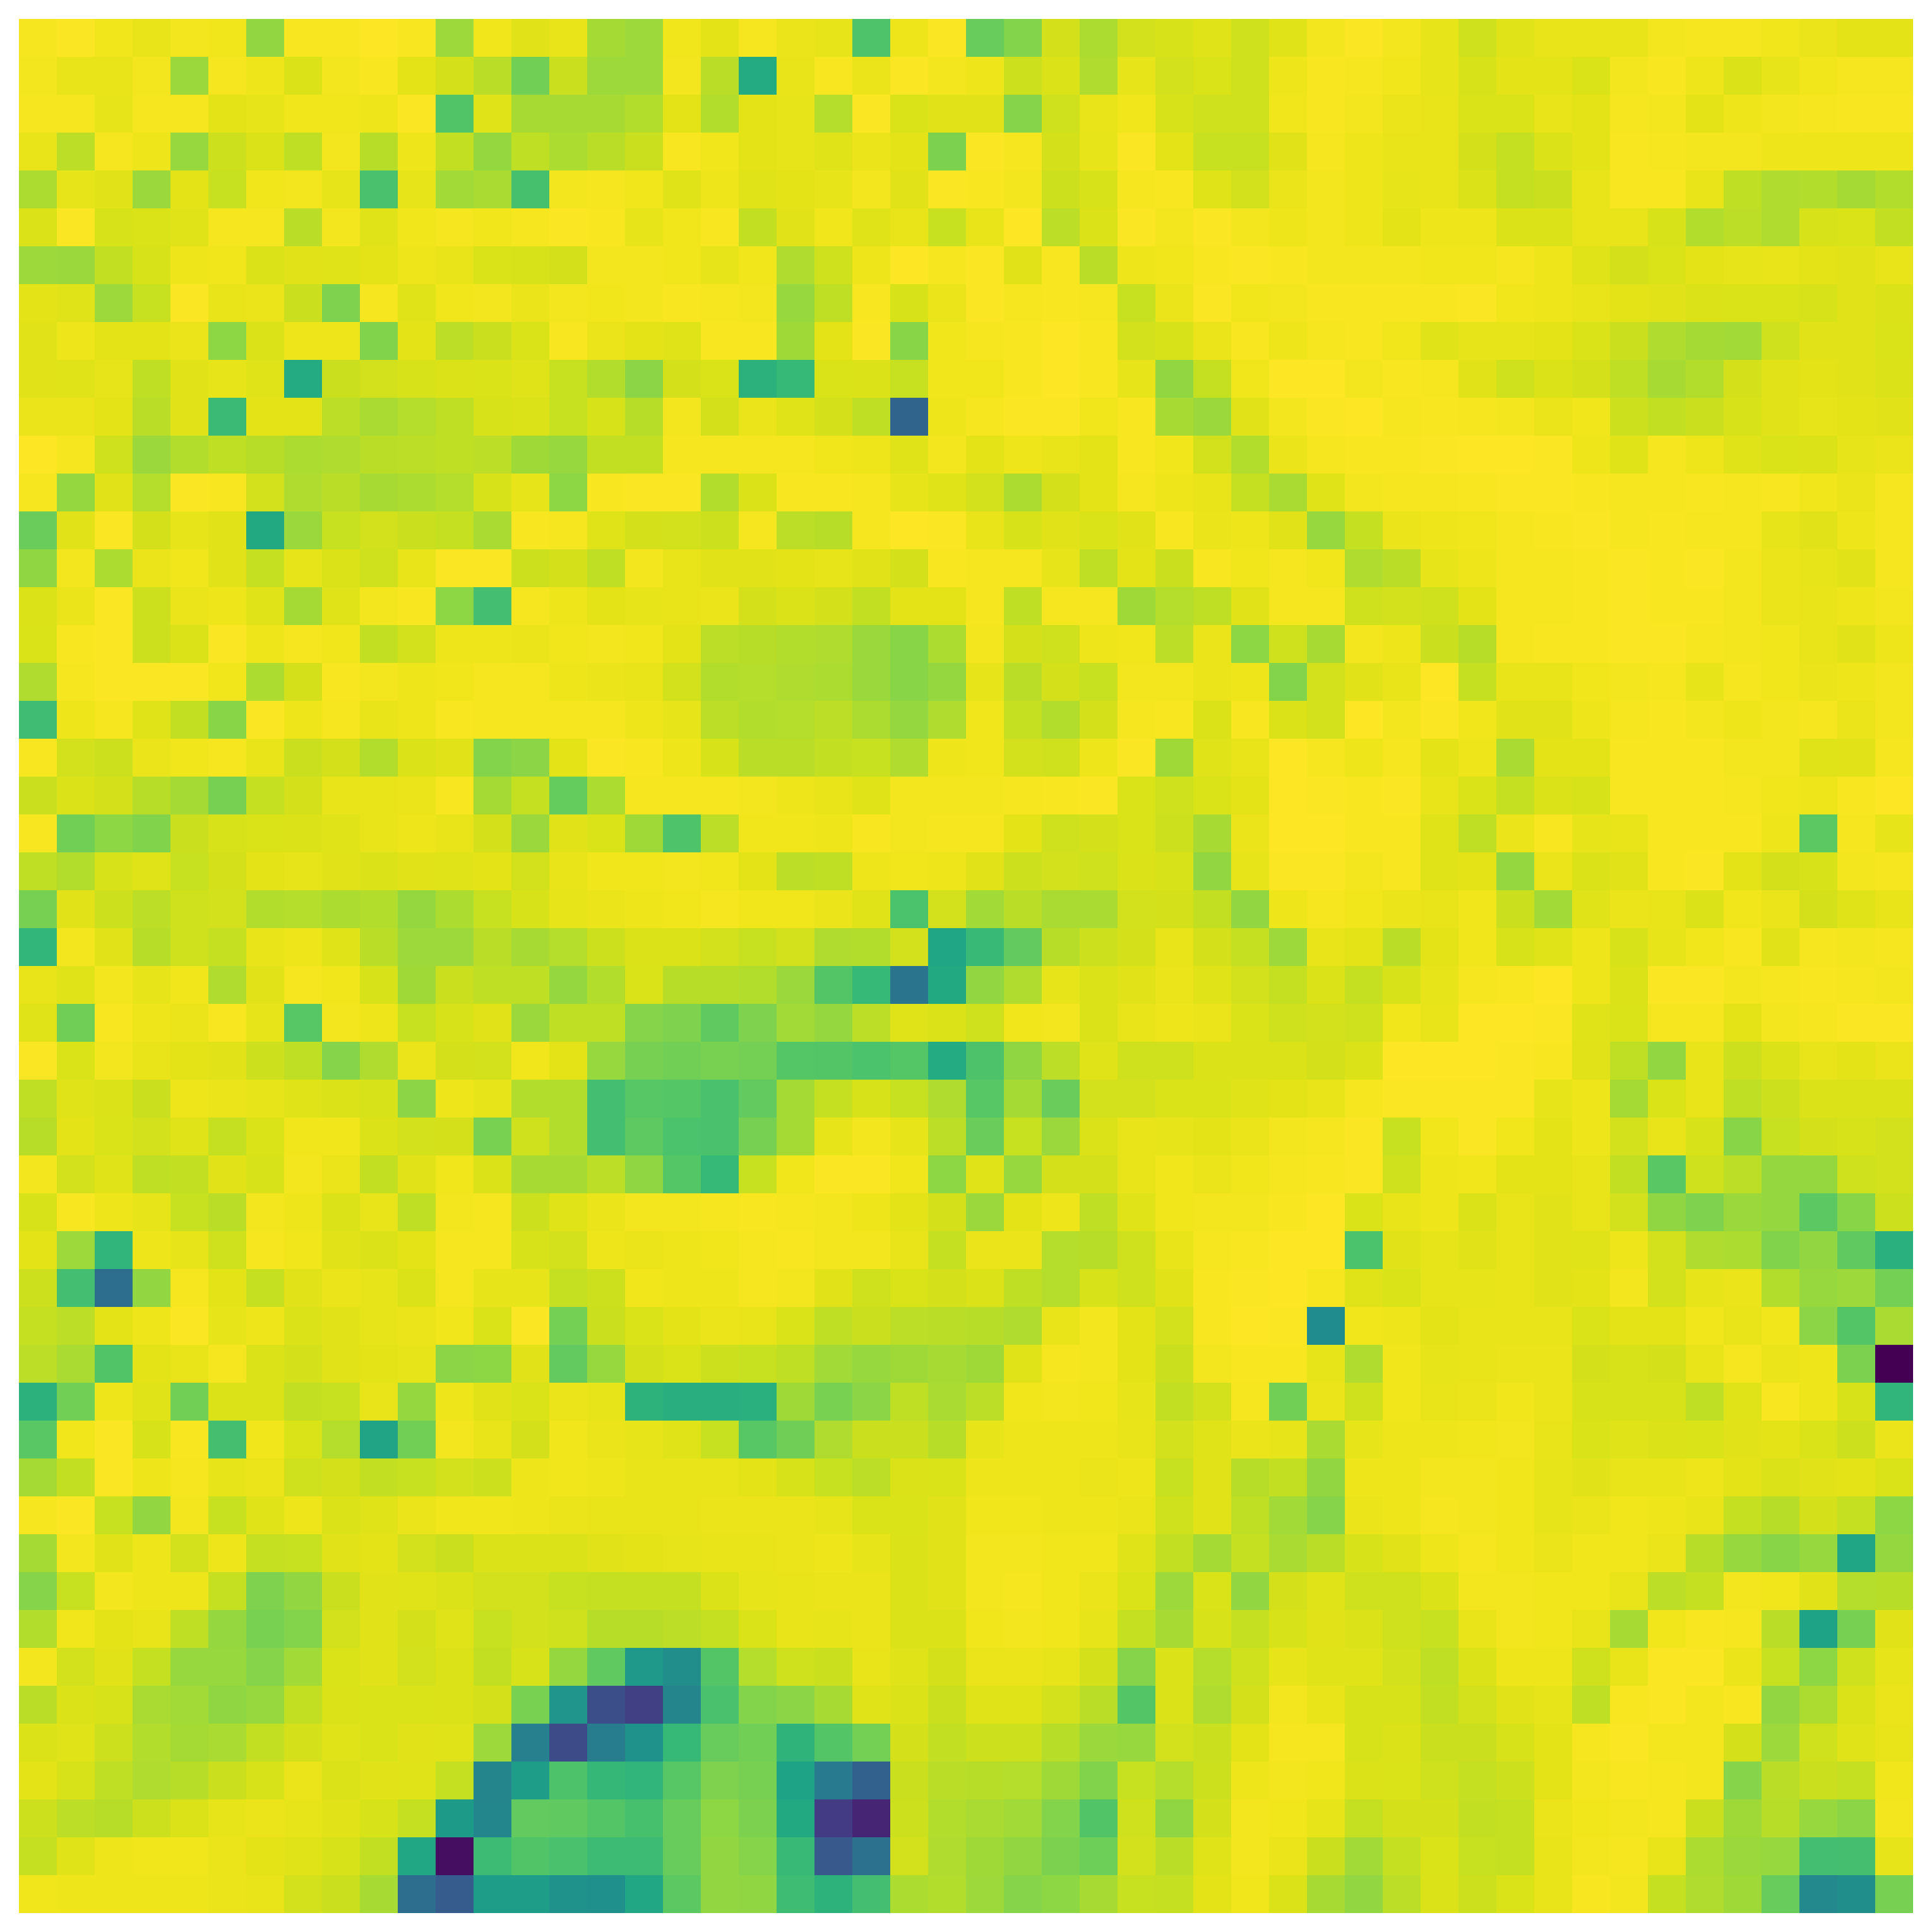

In [77]:
deep_nn.visualize()

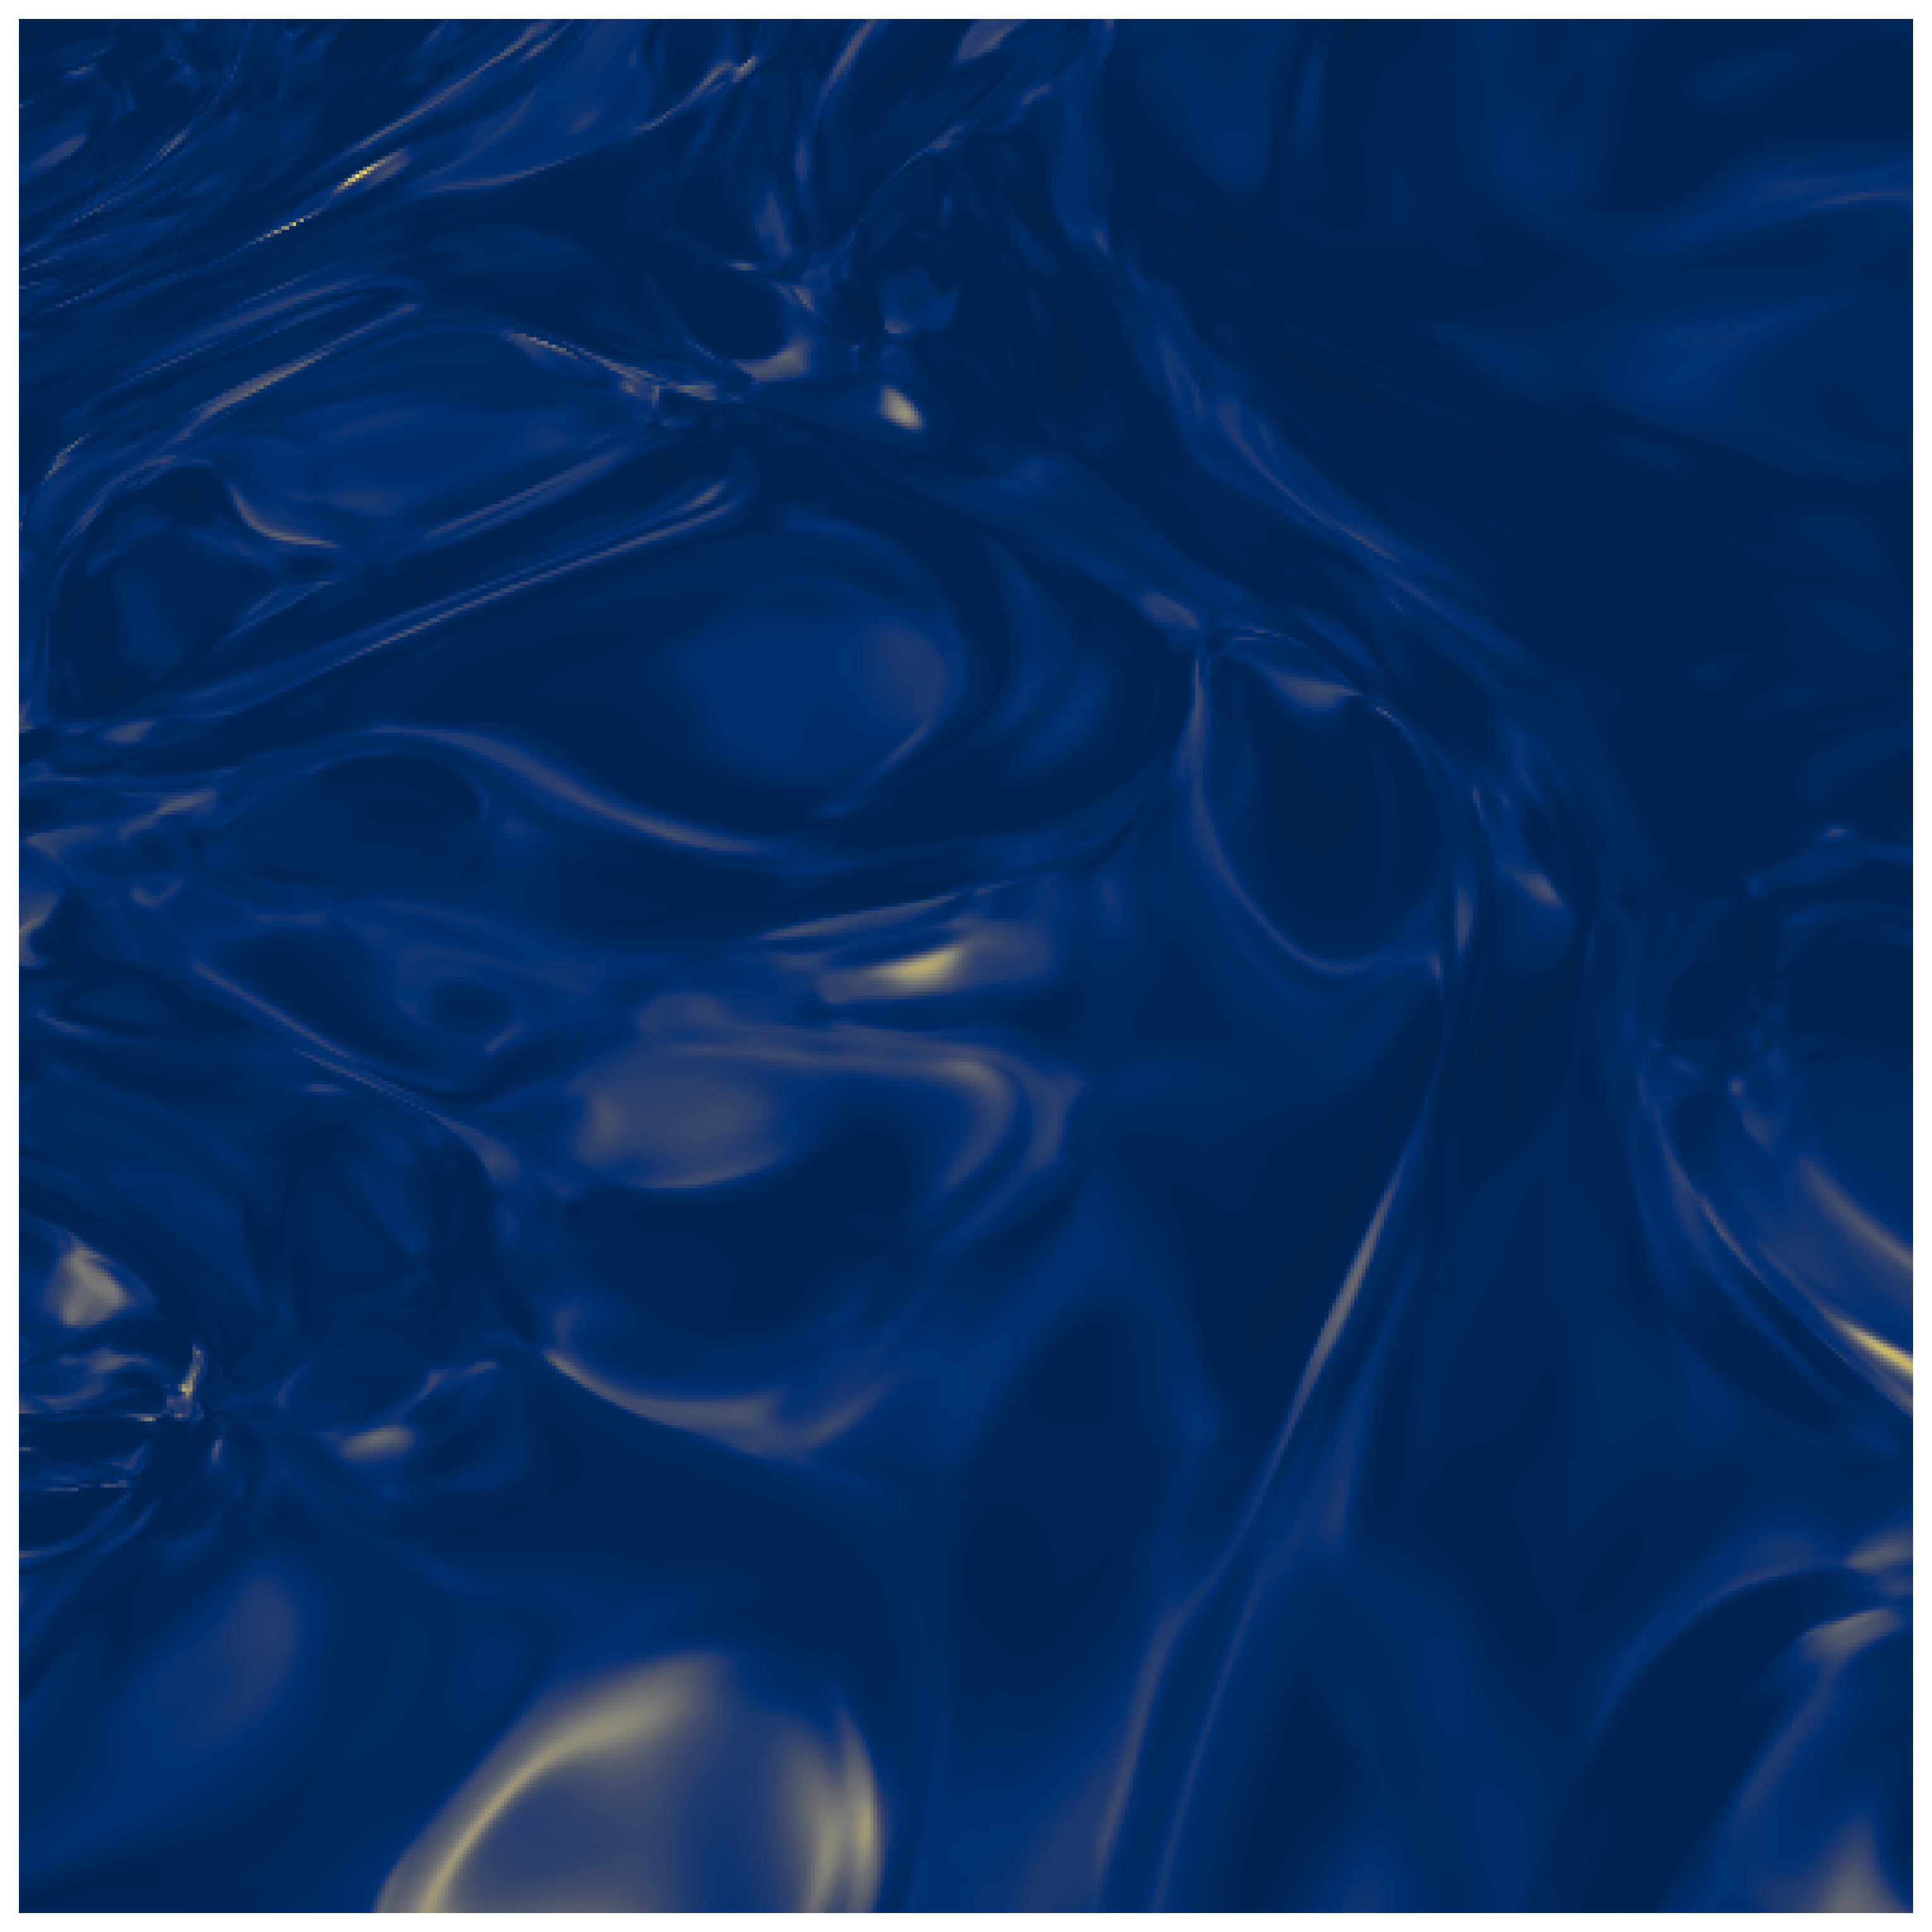

In [80]:
deep_nn.visualize(grid_size=512, colormap='cividis', c_reverse=True)